In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv('iris.data', sep = ",", header=None, names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class'])

In [2]:
df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

In [4]:
df['Class'] = df['Class'].replace('Iris-virginica', 2)
df['Class'] = df['Class'].replace('Iris-setosa', 0)
df['Class'] = df['Class'].replace('Iris-versicolor', 1)

In [12]:
df.astype('float64')
df['Class'] = df['Class'].astype('int64')

In [20]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [18]:
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y = pd.DataFrame(y)

In [33]:
X = X.values
X = StandardScaler().fit_transform(X)
print(X)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [34]:
#Import KMeans model and instantiate it.
from sklearn.cluster import KMeans
clusterNum = 3
clustering = KMeans(init = "k-means++", n_clusters = clusterNum, random_state=5)
#Use fit method to create a model
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [35]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



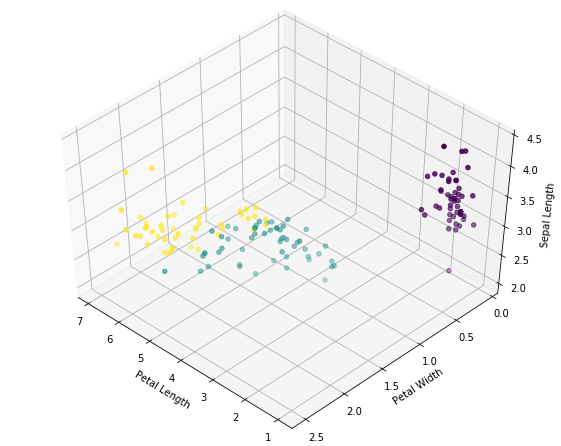

In [50]:
from mpl_toolkits.mplot3d import Axes3D 
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']
y.columns = ['Class']
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')

ax.scatter(df['Petal length'], df['Petal width'], df['Sepal width'], c= relabel)

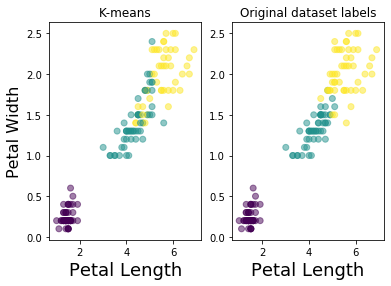

In [49]:
plt.subplot(1,2,1)
plt.scatter(df['Petal length'], df['Petal width'], c=relabel, alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=16)
plt.title('K-means')

#Set a variable color_theme to color our data points by their species label. 
#color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,2)
plt.scatter(df['Petal length'], df['Petal width'], c=df['Class'].astype('int64'), alpha=0.5)
plt.xlabel('Petal Length', fontsize=18)
plt.title('Original dataset labels')
plt.show()